## **07. 스레시홀딩(Thresholding), 오츠의 알고리즘(Otsu's Method)**

### **스레시홀딩(Thresholding)**  
바이너리 이미지를 만드는 가장 대표적인 방법  
바이너리 이미지(binary image)란 검은색과 흰색만으로 표현한 이미지

**전역 스레시홀딩**

어떤 임계값을 정한 뒤 픽셀 값이 임계값을 넘으면 255, 임계값을 넘지 않으면 0으로 지정하는 방식을 전역 스레시홀딩

127.0


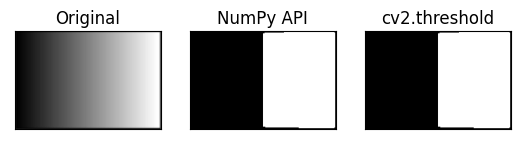

In [2]:
# 전역 스레시홀딩 (threshold.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./asset/img/06.png', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ img > 127] = 255      # 127 보다 큰 값만 255로 변경

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

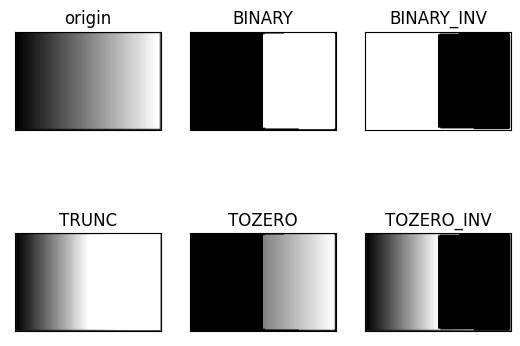

In [3]:
# 스레시홀딩 플래그 (threshold_flag.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./asset/img/06.png', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()

### **오츠의 알고리즘(Otsu's Method)**  

임계값을 임의로 정해 픽셀을 두 부류로 나누고 두 부류의 명암 분포를 구하는 작업을 반복  
모든 경우의 수 중에서 두 부류의 명암 분포가 가장 균일할 때의 임계값을 선택

otsu threshold: 124.0


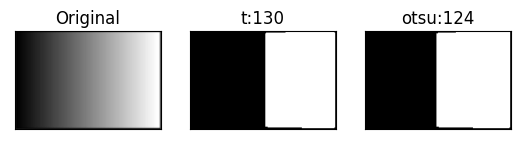

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('./asset/img/06.png', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()